<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iteartors

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timedelta, timezone
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_customers_dataset.csv',
 'lead_conversion.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'scanner_data.csv',
 'bz_data_analyis.csv',
 'match_result_test.csv',
 '1_orders_dataset.csv',
 'test.csv',
 'online_retail.xlsx',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'cookie_cats.csv',
 'sample-sales-data.csv',
 'sales_data_with_stores.csv',
 'groceries.csv',
 'ab_experiment.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_vs_discount.csv',
 'app_wau.csv',
 'online_retail_II.xlsx',
 'sales.csv',
 'sample_data']

In [8]:
df = pd.read_csv('ab_experiment.csv')
df['occurred_at'] = df['occurred_at'].to_numpy().astype('datetime64[ns]')
df['date'] = df['occurred_at'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df.head()

,user_id,occurred_at,experiment,experiment_group,location,device,user_type,date,week
0,4.0,2014-06-05 15:20:16,publisher_update,control_group,India,lenovo thinkpad,3.0,2014-06-05,2014-06-02
1,8198.0,2014-06-11 09:31:32,publisher_update,control_group,Japan,nokia lumia 635,1.0,2014-06-11,2014-06-09
2,11.0,2014-06-17 09:31:22,publisher_update,control_group,United States,iphone 4s,1.0,2014-06-17,2014-06-16
3,8209.0,2014-06-04 09:31:21,publisher_update,test_group,Turkey,nokia lumia 635,1.0,2014-06-04,2014-06-02
4,19.0,2014-06-04 09:31:33,publisher_update,test_group,Nigeria,iphone 5,1.0,2014-06-04,2014-06-02


In [19]:
cnt = df[['experiment_group','user_type']].value_counts().reset_index(name = 'cnt').sort_values(['user_type'])
cnt

,experiment_group,user_type,cnt
1,control_group,1.0,498
3,test_group,1.0,394
2,control_group,2.0,474
5,test_group,2.0,210
0,control_group,3.0,774
4,test_group,3.0,245


<AxesSubplot:xlabel='user_type', ylabel='cnt'>

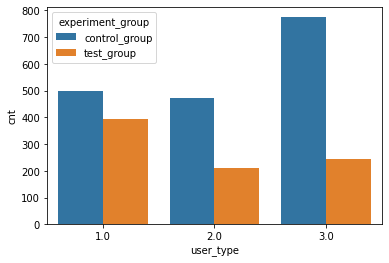

In [20]:
sns.barplot(data = cnt, x = 'user_type', y = 'cnt', hue = 'experiment_group')

In [21]:
df['location'].value_counts()

United States           749
Japan                   187
Germany                 164
France                  130
United Kingdom          123
Italy                    92
Russia                   83
Brazil                   83
Canada                   80
India                    77
Mexico                   67
Korea                    66
Australia                52
Spain                    49
Indonesia                39
Netherlands              35
Saudi Arabia             35
Sweden                   34
Switzerland              27
Poland                   24
United Arab Emirates     24
Taiwan                   24
Turkey                   23
Belgium                  23
Argentina                19
Israel                   18
Iran                     18
Philippines              17
Denmark                  17
Austria                  17
Thailand                 16
Norway                   16
Malaysia                 15
Hong Kong                15
South Africa             14
Egypt               

In [31]:
cnt2 = df[df['location'].isin(['United States', 'Japan'])][['location', 'device']].value_counts().reset_index(name = 'cnt')
cnt2['ratio'] = cnt2.groupby(['location'])['cnt'].apply(lambda x : round(x/sum(x)* 100, 2))
cnt2.head()

,location,device,cnt,ratio
0,United States,macbook pro,111,14.82
1,United States,lenovo thinkpad,82,10.95
2,United States,iphone 5,62,8.28
3,United States,macbook air,60,8.01
4,United States,samsung galaxy s4,52,6.94


<AxesSubplot:xlabel='ratio', ylabel='device'>

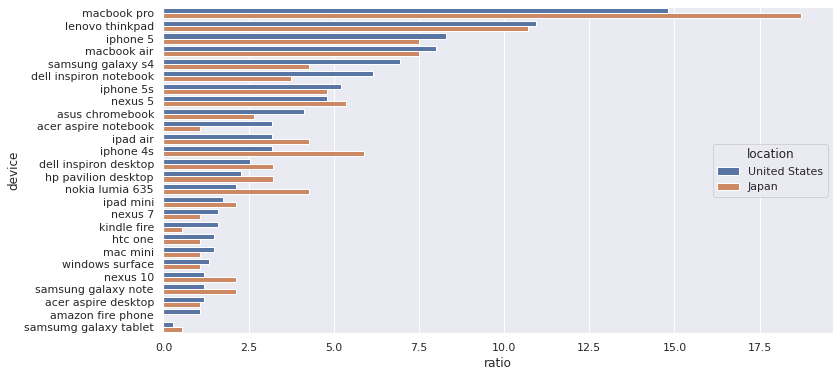

In [32]:
sns.set(rc = {'figure.figsize': [12,6]})
sns.barplot(data = cnt2, x = 'ratio', y = 'device', hue = 'location')

# Iterators

In [33]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [34]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [35]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}